# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [116]:
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install folium
!pip install sklearn
!pip install pickle


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=';')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [28]:
df.shape
print(f'The dataset have {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset have 41188 rows and 21 columns.


In [29]:
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
df_to_process = df.copy()

In [32]:
df_to_process.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [33]:
print(f'The dataset have {df_to_process.duplicated().sum()} duplicated rows.')

The dataset have 12 duplicated rows.


In [34]:
df_to_process.drop_duplicates(inplace=True)
df_to_process.shape

(41176, 21)

In [35]:
columns = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for column in columns:
    print (f'Value count for column - {column}')
    print(df[column].value_counts())
    print('\n\n')

Value count for column - job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64



Value count for column - marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64



Value count for column - education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64



Value count for column - default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64



Value count for column - housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64



Va

In [36]:
df_to_process = df_to_process.replace('unknown', np.nan)
df_to_process

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school     NaN      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

In [37]:
# for categorical variables replace NaN with the most frequent value
for var in df_to_process.columns[df_to_process.dtypes == 'object']:
    df_to_process[var] = df_to_process[var].fillna(df_to_process[var].mode()[0])

In [38]:
# for numerical variables replace NaN with the most frequent value
for var in df_to_process.columns[df_to_process.dtypes == 'int64']:
    df_to_process[var] = df_to_process[var].fillna(df_to_process[var].mean())

In [39]:
df_to_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [40]:
df_to_process['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [41]:
fig = px.box(df_to_process, y="age")
fig.show()

In [51]:
def remove_outliers(df_to_process, column):
    IQR = df_to_process[column].describe()['75%'] - df_to_process[column].describe()['25%']
    upper = df_to_process[column].describe()['75%'] + 1.5 * IQR
    print('The upper bound for suspected outliers for {} feature is {}.'.format(column, upper))

    # remove observations above this value
    df_to_process = df_to_process.drop(df_to_process[df_to_process[column] > upper].index)
    fig = px.box(df_to_process, y=column)
    fig.show()      

In [52]:
columns = ['age', 'duration', 'campaign']
for column in columns:
    remove_outliers(df_to_process, column)

The upper bound for suspected outliers for age feature is 69.5.


The upper bound for suspected outliers for duration feature is 644.5.


The upper bound for suspected outliers for campaign feature is 6.0.


In [54]:
fig = px.box(df_to_process, y=df_to_process.loc[df["pdays"] < 999, "pdays"])
fig.show()

In [56]:
df_to_process['education'] = df_to_process['education'].replace({'basic.9y': 'middle_school', 'basic.6y': 'middle_school', 'basic.4y': 'middle_school'})
df_to_process['education'] 

0              middle_school
1                high.school
2                high.school
3              middle_school
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41176, dtype: object

In [57]:
df_to_process['age_bins'] = pd.cut(x=df_to_process['age'], bins=[10,20,30,40,50,60,70,80,90,100])

In [58]:
df_to_process[['age_bins','age']].head()

age_bins  age
0  (50, 60]   56
1  (50, 60]   57
2  (30, 40]   37
3  (30, 40]   40
4  (50, 60]   56

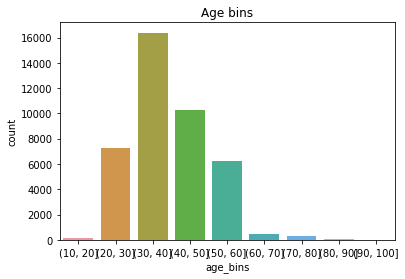

In [59]:
def countplot_features(feature, title):
    sns.set_palette("Set2")
    plot=sns.countplot(x=feature,data=df_to_process).set(title=title)
    plt.show()


countplot_features("age_bins", "Age bins")

In [60]:
df_to_process = df_to_process.drop('age',axis=1)
df_to_process

job  marital            education default housing loan  \
0        housemaid  married        middle_school      no      no   no   
1         services  married          high.school      no      no   no   
2         services  married          high.school      no     yes   no   
3           admin.  married        middle_school      no      no   no   
4         services  married          high.school      no      no  yes   
...            ...      ...                  ...     ...     ...  ...   
41183      retired  married  professional.course      no     yes   no   
41184  blue-collar  married  professional.course      no      no   no   
41185      retired  married    university.degree      no     yes   no   
41186   technician  married  professional.course      no      no   no   
41187      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  ...  pdays  previous  \
0      telephone   may         mon       261  ...    999         0   
1      telephone   may         mon       149  ...    999         0   
2      telephone   may         mon       226  ...    999         0   
3      telephone   may         mon       151  ...    999         0   
4      telephone   may         mon       307  ...    999         0   
...          ...   ...         ...       ...  ...    ...       ...   
41183   cellular   nov         fri       334  ...    999         0   
41184   cellular   nov         fri       383  ...    999         0   
41185   cellular   nov         fri       189  ...    999         0   
41186   cellular   nov         fri       442  ...    999         0   
41187   cellular   nov         fri       239  ...    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  age_bins  
0           5191.0   no  (50, 60]  
1           5191.0   no  (50, 60]  
2           5191.0   no  (30, 40]  
3           5191.0   no  (30, 40]  
4           5191.0   no  (50, 60]  
...            ...  ...       ...  
41183       4963.6  yes  (70, 80]  
41184       4963.6   no  (40, 50]  
41185       4963.6   no  (50, 60]  
41186       4963.6  yes  (40, 50]  
41187       4963.6   no  (70, 80]  

[41176 rows x 21 columns]

In [66]:
values = df_to_process['y'].value_counts()
print('% of clients that did not suscribe a term desposit:',round((values[0] / len(df_to_process)) *100, 2))
print('% of clients that suscribed a term desposit:',round((values[1] / len(df_to_process)) *100, 2))
print('Umbalanced data')

% of clients that did not suscribe a term desposit: 88.73
% of clients that suscribed a term desposit: 11.27
Umbalanced data


In [67]:
df_to_process = pd.get_dummies(df_to_process, columns=['y','age_bins','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], drop_first=True)
df_to_process.describe()

duration      campaign         pdays      previous  emp.var.rate  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean     258.315815      2.567879    962.464810      0.173013      0.081922   
std      259.305321      2.770318    186.937102      0.494964      1.570883   
min        0.000000      1.000000      0.000000      0.000000     -3.400000   
25%      102.000000      1.000000    999.000000      0.000000     -1.800000   
50%      180.000000      2.000000    999.000000      0.000000      1.100000   
75%      319.000000      3.000000    999.000000      0.000000      1.400000   
max     4918.000000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  \
count    41176.000000   41176.000000  41176.000000  41176.000000   
mean        93.575720     -40.502863      3.621293   5167.034870   
std          0.578839       4.627860      1.734437     72.251364   
min         92.201000     -50.800000      0.634000   4963.600000   
25%         93.075000     -42.700000      1.344000   5099.100000   
50%         93.749000     -41.800000      4.857000   5191.000000   
75%         93.994000     -36.400000      4.961000   5228.100000   
max         94.767000     -26.900000      5.045000   5228.100000   

              y_yes  ...     month_may     month_nov     month_oct  \
count  41176.000000  ...  41176.000000  41176.000000  41176.000000   
mean       0.112663  ...      0.334345      0.099573      0.017413   
std        0.316184  ...      0.471767      0.299433      0.130806   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      1.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

          month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
count  41176.000000     41176.000000     41176.000000     41176.000000   
mean       0.013843         0.206722         0.209297         0.196377   
std        0.116841         0.404960         0.406812         0.397261   
min        0.000000         0.000000         0.000000         0.000000   
25%        0.000000         0.000000         0.000000         0.000000   
50%        0.000000         0.000000         0.000000         0.000000   
75%        0.000000         0.000000         0.000000         0.000000   
max        1.000000         1.000000         1.000000         1.000000   

       day_of_week_wed  poutcome_nonexistent  poutcome_success  
count     41176.000000          41176.000000      41176.000000  
mean          0.197542              0.863391          0.033345  
std           0.398150              0.343438          0.179537  
min           0.000000              0.000000          0.000000  
25%           0.000000              1.000000          0.000000  
50%           0.000000              1.000000          0.000000  
75%           0.000000              1.000000          0.000000  
max           1.000000              1.000000          1.000000  

[8 rows x 53 columns]

In [68]:
df_to_process = df_to_process.drop(['duration','pdays'], axis=1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit(df_to_process[['campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

df_to_process[['campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = df_scaler.transform(df_to_process[['campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])


In [81]:
df_processed = df_to_process.copy()
df_processed.to_csv('../data/processed/df_processed.csv')

# Logistic Regresion

In [82]:
df_raw = pd.read_csv('../data/processed/df_processed.csv', sep=',')
df_raw.columns

Index(['Unnamed: 0', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_yes',
       'age_bins_(20, 30]', 'age_bins_(30, 40]', 'age_bins_(40, 50]',
       'age_bins_(50, 60]', 'age_bins_(60, 70]', 'age_bins_(70, 80]',
       'age_bins_(80, 90]', 'age_bins_(90, 100]', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_illiterate', 'education_middle_school',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonex

In [83]:
features = ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_bins_(20, 30]', 'age_bins_(30, 40]', 'age_bins_(40, 50]', 'age_bins_(50, 60]', 'age_bins_(60, 70]', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_middle_school', 'education_professional.course', 'education_university.degree', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug','poutcome_nonexistent', 'poutcome_success']

In [84]:
X = df_raw[features]
y = df_raw['y_yes']

In [85]:
y.value_counts(normalize=True)

0    0.887337
1    0.112663
Name: y_yes, dtype: float64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [90]:
model = LogisticRegression()

In [91]:
model.fit(X_train, y_train) 

LogisticRegression()

In [118]:
filename = '../models/original_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [92]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
accuracy_score(y_test, y_pred)

0.8984861976847729

In [100]:
cross_tab = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['actual'], colnames=['predicted'])
print(f'{cross_tab[0][1]+ cross_tab[1][1]} Wrong predictions on observations.')

1392 Wrong predictions on observations.


In [101]:
df_pred = pd.DataFrame({'Actual': np.array(y_test), 'Prediction': np.array(y_pred)})
df_pred

Actual  Prediction
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0
...       ...         ...
12348       0           0
12349       0           0
12350       0           0
12351       0           0
12352       0           0

[12353 rows x 2 columns]

In [102]:
print(classification_report(df_pred['Actual'], df_pred['Prediction']))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.68      0.19      0.29      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



In [104]:
# optimize model
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']

penalty = ['l2'] # regularización

c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best: 0.898549 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898371 (0.002920) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898404 (0.002891) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898363 (0.002913) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.898339 (0.002934) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898355 (0.002914) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898347 (0.002944) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.898339 (0.003032) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898323 (0.003044) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898339 (0.003021) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.898541 (0.002679) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898549 (0.002684) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898509 (0.002756) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.898452 (0.002307) with: {

In [108]:
optimized_model = LogisticRegression(C= 0.1, penalty='l2', solver= 'lbfgs')

In [109]:
optimized_model.fit(X_train, y_train) 

LogisticRegression(C=0.1)

In [110]:
y_pred = optimized_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
accuracy_score(y_pred, y_test)

0.8981623897029062

In [112]:
cross_tab = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['actual'], colnames=['predicted'])
print(f'{cross_tab[0][1]+ cross_tab[1][1]} Wrong predictions on observations.')

1392 Wrong predictions on observations.


In [113]:
df_pred = pd.DataFrame({'Actual': np.array(y_test), 'Prediction': np.array(y_pred)})
df_pred

Actual  Prediction
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0
...       ...         ...
12348       0           0
12349       0           0
12350       0           0
12351       0           0
12352       0           0

[12353 rows x 2 columns]

In [114]:
print(classification_report(df_pred['Actual'], df_pred['Prediction']))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10961
           1       0.69      0.17      0.28      1392

    accuracy                           0.90     12353
   macro avg       0.80      0.58      0.61     12353
weighted avg       0.88      0.90      0.87     12353



In [119]:
filename = '../models/optimized_model.sav'
pickle.dump(optimized_model, open(filename, 'wb'))